In [1]:
import pickle
import pandas as pd
import numpy as np

In [2]:
kinship_regions = pickle.load(open('kr.p','rb'))

In [3]:
nuts1 = ['UKC','UKD','UKE','UKF','UKG','UKH','UKI','UKJ','UKK','UKL','UKM']
nuts1_index = {}
for i, n in enumerate(nuts1):
    nuts1_index[n]=i
nuts1_index

{'UKC': 0,
 'UKD': 1,
 'UKE': 2,
 'UKF': 3,
 'UKG': 4,
 'UKH': 5,
 'UKI': 6,
 'UKJ': 7,
 'UKK': 8,
 'UKL': 9,
 'UKM': 10}

In [4]:
connections = np.zeros([len(nuts1),len(nuts1)])

In [5]:
for nuts3 in sorted(kinship_regions.keys()):
    row_i = nuts1_index[nuts3[:-2]]
    for reg in sorted(kinship_regions[nuts3].keys()):
        col_i = nuts1_index[reg[:-2]]
        connections[row_i,col_i] += kinship_regions[nuts3][reg]

In [6]:
# normalize each row by x / total
def norm_rows(a):
    return a / np.sum(a)

norm_connections = np.apply_along_axis(norm_rows, 1, connections)

In [24]:
for r in range(np.shape(norm_connections)[0]):
    print(np.sum(norm_connections[r,:]))

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [7]:
norm_connections_df = pd.DataFrame(norm_connections, index=nuts1, columns=nuts1) 

In [8]:
norm_connections_df.to_csv('nuts1_connections.csv')

In [10]:
import matplotlib.pyplot as plt

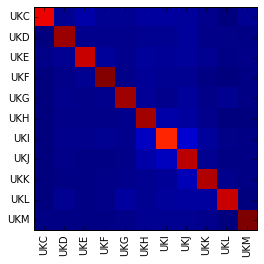

In [11]:
plt.imshow(norm_connections, interpolation= 'nearest',cmap='jet')
plt.yticks(np.arange(len(nuts1)),nuts1)
plt.xticks(np.arange(len(nuts1)),nuts1,rotation=90)
plt.savefig('nuts1_connection_matrix.png',dpi=300)
plt.show()

Need to make a csv file for QGIS:  
nuts_reg_1,centroid_x_1,centroid_y_1,nuts_reg_2,centroid_x_2,centroid_y_2,kin_connection

In [12]:
centroids = pd.read_csv('nuts1_centroids.csv')

In [13]:
centroids

,X,Y,LEVL_CODE,NUTS_ID,CNTR_CODE,NUTS_NAME
0,406294.177291,569223.337055,1,UKC,UK,North East (England)
1,353013.792259,461751.668628,1,UKD,UK,North West (England)
2,450743.458406,452364.705629,1,UKE,UK,Yorkshire and the Humber
3,480296.274210,337095.584610,1,UKF,UK,East Midlands (England)
4,381704.551781,286827.770398,1,UKG,UK,West Midlands (England)
5,573324.933398,264295.714506,1,UKH,UK,East of England
6,531208.767022,179637.217083,1,UKI,UK,London
7,502537.538208,154526.856816,1,UKJ,UK,South East (England)
8,319488.205729,122922.782698,1,UKK,UK,South West (England)
9,279854.826204,271791.586276,1,UKL,UK,Wales


In [16]:
o = open('nuts1_centroids_connections.csv','w')
o.write('nuts_reg_1,centroid_x_1,centroid_y_1,nuts_reg_2,centroid_x_2,centroid_y_2,kin_connection\n')
for region1 in sorted(nuts1_index.keys()):
    centroid_x_1 = str(centroids[centroids.NUTS_ID==region1]['X'].values[0])
    centroid_y_1 = str(centroids[centroids.NUTS_ID==region1]['Y'].values[0])
    for region2 in sorted(nuts1_index.keys()):
        centroid_x_2 = str(centroids[centroids.NUTS_ID==region2]['X'].values[0])
        centroid_y_2 = str(centroids[centroids.NUTS_ID==region2]['Y'].values[0])
        connection = str(norm_connections[nuts1_index[region1],nuts1_index[region2]])
        pair = ','.join(sorted([region1,region2]))
        if region1 != region2:
            o.write(','.join([region1,centroid_x_1,centroid_y_1,region2,centroid_x_2,centroid_y_2,connection])+'\n')
o.close()

In [19]:
kin_connections = pd.read_csv('nuts1_centroids_connections.csv')
kin_connections

,nuts_reg_1,centroid_x_1,centroid_y_1,nuts_reg_2,centroid_x_2,centroid_y_2,kin_connection
0,UKC,406294.177291,569223.337055,UKD,353013.792259,461751.668628,0.016438
1,UKC,406294.177291,569223.337055,UKE,450743.458406,452364.705629,0.033698
2,UKC,406294.177291,569223.337055,UKF,480296.274210,337095.584610,0.016502
3,UKC,406294.177291,569223.337055,UKG,381704.551781,286827.770398,0.016502
4,UKC,406294.177291,569223.337055,UKH,573324.933398,264295.714506,0.028454
5,UKC,406294.177291,569223.337055,UKI,531208.767022,179637.217083,0.029307
6,UKC,406294.177291,569223.337055,UKJ,502537.538208,154526.856816,0.023631
7,UKC,406294.177291,569223.337055,UKK,319488.205729,122922.782698,0.014258
8,UKC,406294.177291,569223.337055,UKL,279854.826204,271791.586276,0.005423
9,UKC,406294.177291,569223.337055,UKM,266438.265670,771276.110331,0.017228


In [25]:
# make sure everything is normalized correctly
for reg in nuts1: 
    s = np.sum(kin_connections[kin_connections.nuts_reg_1==reg]['kin_connection'].values)
    print(reg,s)

UKC 0.201440591401
UKD 0.140929150445
UKE 0.175280568753
UKF 0.121497585363
UKG 0.141784359693
UKH 0.145573771673
UKI 0.231646110772
UKJ 0.162927998176
UKK 0.155579588039
UKL 0.175763014052
UKM 0.117499843584
